In [89]:
from src.features.build_features import get_roast_classification_dataset
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from gensim.utils import simple_preprocess
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

In [57]:
X, y = get_roast_classification_dataset()

In [58]:
X_tokenized = []
for i, doc in enumerate(X):
    tokens = simple_preprocess(doc)
    tagged_doc = TaggedDocument(tokens, [i])
    X_tokenized.append(tagged_doc)

In [59]:
X_tokenized[1]

TaggedDocument(words=['bright', 'juicy', 'richly', 'fruit', 'centered', 'pineapple', 'guava', 'cocoa', 'nib', 'marjoram', 'hazelnut', 'cedar', 'in', 'aroma', 'and', 'cup', 'sweet', 'tart', 'structure', 'with', 'brisk', 'acidity', 'plush', 'syrupy', 'mouthfeel', 'fruit', 'forward', 'finish', 'with', 'undertones', 'of', 'marjoram', 'and', 'cedar'], tags=[1])

In [60]:
# Split into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X_tokenized, y, test_size=0.2, random_state=25)

In [61]:
# create model
model = Doc2Vec(vector_size=50, min_count=2, epochs=40)

In [62]:
# build a vocabulary
model.build_vocab(X_train)

In [63]:
# view the vocab
model.wv.index_to_key

['and',
 'in',
 'the',
 'cup',
 'sweet',
 'finish',
 'aroma',
 'chocolate',
 'of',
 'with',
 'mouthfeel',
 'acidity',
 'toned',
 'notes',
 'fruit',
 'rich',
 'but',
 'flowers',
 'syrupy',
 'dark',
 'tart',
 'flavor',
 'cedar',
 'long',
 'sweetly',
 'cocoa',
 'like',
 'as',
 'floral',
 'richly',
 'hint',
 'to',
 'balanced',
 'structure',
 'crisp',
 'milk',
 'is',
 'lightly',
 'hints',
 'into',
 'gently',
 'deep',
 'pungent',
 'complex',
 'orange',
 'by',
 'nib',
 'nut',
 'delicate',
 'savory',
 'resonant',
 'silky',
 'smooth',
 'drying',
 'full',
 'very',
 'fresh',
 'bright',
 'lemon',
 'coffee',
 'juicy',
 'round',
 'zest',
 'deeply',
 'roasted',
 'small',
 'espresso',
 'cherry',
 'saturated',
 'short',
 'dry',
 'honey',
 'almond',
 'that',
 'consolidates',
 'crisply',
 'citrus',
 'wood',
 'cacao',
 'satiny',
 'aromatic',
 'carry',
 'parts',
 'evaluated',
 'black',
 'sweetness',
 'cut',
 'apricot',
 'caramel',
 'body',
 'lively',
 'ken',
 'rather',
 'slightly',
 'though',
 'tones',
 'd

In [64]:
# vocab size
model.corpus_count

4492

In [65]:
# train model on corpus
model.train(X_train, total_examples=model.corpus_count, epochs=model.epochs)

In [66]:
# look at document vector for example sentence
model.infer_vector(X_tokenized[1].words)

array([-0.6254936 ,  0.10342389,  0.05549301,  0.6311537 ,  0.4091901 ,
       -0.12345608,  0.11715131, -0.9616447 ,  0.36074442, -0.35059035,
       -0.33271235, -0.12591334,  0.07291114, -0.64038587,  0.44799748,
        0.11540723,  0.8464893 , -0.1540554 ,  0.00779844, -0.71206594,
        0.22850376,  0.19035621,  0.6634836 , -0.21681382, -0.08576201,
       -0.1631227 , -0.03449772,  0.38789314, -0.60177857, -0.44442862,
       -0.12104931,  0.22056648, -0.03796069,  0.12154137, -0.11070753,
       -0.5477409 , -0.519822  , -0.46021605, -0.90996534, -0.1894882 ,
        0.28970563, -0.02743867,  0.6926611 , -0.04313691,  0.75881773,
        0.18555291, -0.13288735,  0.33077013, -0.01832455,  0.1884162 ],
      dtype=float32)

## Sanity Check the Model

It looks like almost all documents are most similar to themselves, which is good.

In [67]:
X_train[1]

TaggedDocument(words=['sweetly', 'pungent', 'roast', 'rounded', 'dark', 'chocolate', 'floral', 'vanilla', 'orange', 'zest', 'scorched', 'cedar', 'in', 'aroma', 'and', 'cup', 'pungent', 'bittersweet', 'acidity', 'lightly', 'syrupy', 'mouthfeel', 'bittersweet', 'but', 'resonant', 'in', 'the', 'finish', 'chocolate', 'and', 'orange', 'dominate', 'in', 'bittersweet', 'but', 'resonant', 'finish'], tags=[1489])

In [68]:
inferred_vector = model.infer_vector(X_train[1].words)
model.dv.most_similar([inferred_vector], topn=len(model.dv))

[(1489, 0.9233461022377014),
 (3405, 0.6508126258850098),
 (3179, 0.6455963850021362),
 (830, 0.6269227862358093),
 (2793, 0.6009908318519592),
 (2338, 0.5873242020606995),
 (5336, 0.575897753238678),
 (2911, 0.5739141702651978),
 (3381, 0.570126473903656),
 (5154, 0.562047004699707),
 (3319, 0.5390218496322632),
 (2758, 0.5350515842437744),
 (1796, 0.5347639918327332),
 (3688, 0.529168963432312),
 (2371, 0.5249394774436951),
 (2370, 0.523350715637207),
 (4445, 0.5205416083335876),
 (3544, 0.5152827501296997),
 (1995, 0.5118746757507324),
 (1464, 0.5081100463867188),
 (2626, 0.5037606358528137),
 (3676, 0.4988369047641754),
 (2245, 0.49418362975120544),
 (3570, 0.49365416169166565),
 (4999, 0.4887814223766327),
 (3572, 0.4872678220272064),
 (5077, 0.4856063723564148),
 (3860, 0.48500171303749084),
 (2996, 0.4846462607383728),
 (2963, 0.48385006189346313),
 (2908, 0.4807438850402832),
 (251, 0.4806283116340637),
 (4248, 0.4783077836036682),
 (5091, 0.4782073497772217),
 (1504, 0.4749755

In [69]:
ranks = []
second_ranks = []
for idx in range(len(X_train)):
    doc_id = X_train[idx].tags[0]
    inferred_vector = model.infer_vector(X_train[idx].words)
    sims = model.dv.most_similar([inferred_vector], topn=len(model.dv))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    
    second_ranks.append(sims[1])

In [70]:
import collections

counter = collections.Counter(ranks)
print(counter)

Counter({0: 4489, 1: 3})


## Classifier

In [71]:
X_train_doc2vec = []
for idx in range(len(X_train)):
    inferred_vector = model.infer_vector(X_train[idx].words)
    X_train_doc2vec.append(inferred_vector)

In [77]:
X_train_doc2vec[0].shape

(50,)

In [80]:
# Fit model, and make predictions
rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=32, max_features=50, n_jobs=-1, oob_score=True, random_state=23)
rnd_clf.fit(X_train_doc2vec, y_train)
rnd_clf.oob_score_

0.4853072128227961

In [82]:
rnd_clf = RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=21)
param_dist = {"max_depth": [5, 10, 25, 50, 100, 200],
              "n_estimators": [500],
              "max_features": [10, 20, 30, 40, 50],
              "min_samples_split": [2, 3, 5, 7, 9],
              "bootstrap": [True]}
n_iter_search = 10
random_search = RandomizedSearchCV(rnd_clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, random_state=25,
                                  return_train_score=True)
random_search.fit(X_train_doc2vec, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=21),
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 10, 25, 50, 100, 200],
                                        'max_features': [10, 20, 30, 40, 50],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [500]},
                   random_state=25, return_train_score=True)

In [85]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.482 (std: 0.016)
Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'max_features': 50, 'max_depth': 25, 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.482 (std: 0.017)
Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'max_features': 50, 'max_depth': 25, 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.480 (std: 0.016)
Parameters: {'n_estimators': 500, 'min_samples_split': 7, 'max_features': 40, 'max_depth': 50, 'bootstrap': True}



## Bigger Doc2Vec Vector

In [86]:
# create model
model = Doc2Vec(vector_size=100, min_count=2, epochs=40)
# build a vocabulary
model.build_vocab(X_train)
# train model on corpus
model.train(X_train, total_examples=model.corpus_count, epochs=model.epochs)

# classifier
X_train_doc2vec = []
for idx in range(len(X_train)):
    inferred_vector = model.infer_vector(X_train[idx].words)
    X_train_doc2vec.append(inferred_vector)
    
# Fit model, and make predictions
rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=32, max_features=50, n_jobs=-1, oob_score=True, random_state=23)
rnd_clf.fit(X_train_doc2vec, y_train)
rnd_clf.oob_score_

0.46504897595725736

In [92]:
# create model
model = Doc2Vec(vector_size=25, min_count=2, epochs=40)
# build a vocabulary
model.build_vocab(X_train)
# train model on corpus
model.train(X_train, total_examples=model.corpus_count, epochs=model.epochs)

# classifier
X_train_doc2vec = []
for idx in range(len(X_train)):
    inferred_vector = model.infer_vector(X_train[idx].words)
    X_train_doc2vec.append(inferred_vector)
    
# Fit model, and make predictions
rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=32, max_features=25, n_jobs=-1, oob_score=True, random_state=23)
rnd_clf.fit(X_train_doc2vec, y_train)
rnd_clf.oob_score_

0.47974176313446126

## Learning Curves

In [96]:
training_set_size = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1300, 1400, 1600, 1800, 2000, 2500, 3000, 3500]


train_sizes, train_scores, test_scores, fit_times, _  = learning_curve(
    estimator=RandomForestClassifier(n_estimators=500, max_depth=10, max_features=25, n_jobs=-1, oob_score=True, random_state=21),
    X=X_train_doc2vec,
    y=y_train,
    train_sizes=training_set_size,
    cv=5,
    shuffle=True,
    n_jobs=-1,
    random_state=21,
    return_times=True)

In [97]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

Text(0.5, 1.0, 'Performance of the model')

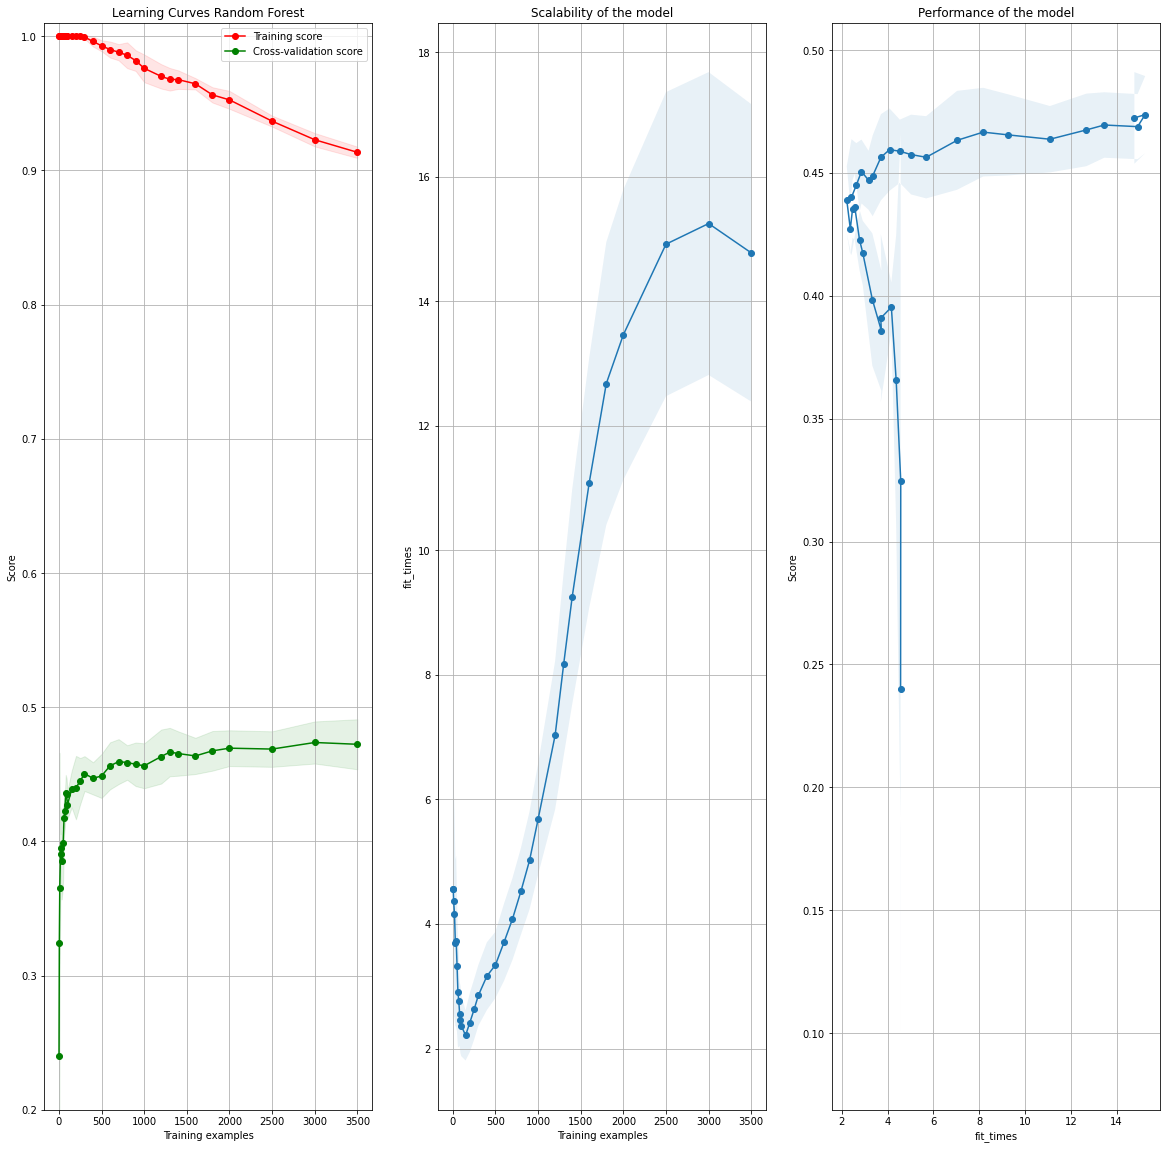

In [98]:
# Plot learning curve
_, axes = plt.subplots(1, 3, figsize=(20, 20))

if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 20))

axes[0].set_title("Learning Curves Random Forest")
axes[0].set_ylim(*(0.20, 1.01))
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")

axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")

# Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                     fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

# Plot fit_time vs score
axes[2].grid()
axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)
axes[2].set_xlabel("fit_times")
axes[2].set_ylabel("Score")
axes[2].set_title("Performance of the model")